# 用户分层模型算法（B站UP主IFL模型）

### IFL模型：
### I：Interaction_rate 表示的是平均每个视频的互动率
### F：Frequency 表示的是每个视频的平均发布周期
### L：Love_rate 表示的是视频的平均点赞率

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv(r"C:\Users\lihuiting\Desktop\数据分析案例应用\bilibili.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99344 entries, 0 to 99343
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   分区        99344 non-null  object 
 1   author    99344 non-null  object 
 2   coins     99343 non-null  float64
 3   danmu     99343 non-null  float64
 4   favorite  99343 non-null  float64
 5   likes     99343 non-null  float64
 6   reply     99343 non-null  float64
 7   share     99343 non-null  float64
 8   view      99343 non-null  float64
 9   title     99344 non-null  object 
 10  date      99344 non-null  object 
dtypes: float64(7), object(4)
memory usage: 8.3+ MB


In [3]:
data.head()

,分区,author,coins,danmu,favorite,likes,reply,share,view,title,date
0,科学科普,视频传奇,0.0,0.0,0.0,0.0,0.0,0.0,0.0,SpaceX 实现首次商业载人航天发射 4K 超高清 英语原音未加工,05/31/2020 16:59:27
1,科学科普,鹿哥来了-,0.0,0.0,0.0,0.0,0.0,0.0,1.0,【科普】历史上最杠精的人，从逻辑层面让你怀疑人生。,05/31/2020 16:58:37
2,科学科普,迟小到不迟到,0.0,0.0,0.0,0.0,0.0,0.0,0.0,[1080P注释]宇宙尺寸比较 2020,05/31/2020 16:58:36
3,科学科普,Sn1985a,0.0,0.0,0.0,0.0,0.0,0.0,0.0,钱德拉X射线天文台带你观赏强射电源天鹅座A（类星体3C405）,05/31/2020 16:58:31
4,科学科普,I-am-Rex,0.0,0.0,0.0,0.0,0.0,0.0,0.0,[当一切公理化]1+1=2 ！/1+1=2 ？,05/31/2020 16:58:23


In [4]:
d=data[data['coins'].isnull()]

In [5]:
data.drop(index = d.index,inplace = True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99343 entries, 0 to 99343
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   分区        99343 non-null  object 
 1   author    99343 non-null  object 
 2   coins     99343 non-null  float64
 3   danmu     99343 non-null  float64
 4   favorite  99343 non-null  float64
 5   likes     99343 non-null  float64
 6   reply     99343 non-null  float64
 7   share     99343 non-null  float64
 8   view      99343 non-null  float64
 9   title     99343 non-null  object 
 10  date      99343 non-null  object 
dtypes: float64(7), object(4)
memory usage: 9.1+ MB


In [6]:
data['date'] = pd.to_datetime(data['date'])
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99343 entries, 0 to 99343
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   分区        99343 non-null  object        
 1   author    99343 non-null  object        
 2   coins     99343 non-null  float64       
 3   danmu     99343 non-null  float64       
 4   favorite  99343 non-null  float64       
 5   likes     99343 non-null  float64       
 6   reply     99343 non-null  float64       
 7   share     99343 non-null  float64       
 8   view      99343 non-null  float64       
 9   title     99343 non-null  object        
 10  date      99343 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(7), object(3)
memory usage: 9.1+ MB


In [7]:
data['分区'].value_counts()

分区
科学科普    99343
Name: count, dtype: int64

In [8]:
df1 = data[['coins','danmu','favorite','likes','reply','share','view']].groupby(data['author']).sum()
df2 = data['title'].groupby(data['author']).count()
df = pd.concat([df1,df2],axis = 1)
earlytime = data['date'].groupby(data['author']).min()
latetime = data['date'].groupby(data['author']).max()
gap_time = (latetime-earlytime).dt.days
df['shijianjiange'] = gap_time
df

,coins,danmu,favorite,likes,reply,share,view,title,shijianjiange
author,,,,,,,,,
-----cyj-----,6.0,2.0,7.0,9.0,0.0,1.0,88.0,3,11
---长征---,16.0,3.0,22.0,45.0,20.0,20.0,1588.0,5,22
--甘宝化铜--,2.0,0.0,1.0,8.0,3.0,1.0,91.0,1,0
--电子工作室--,12.0,17.0,30.0,117.0,55.0,28.0,3164.0,4,29
--百里酚蓝--,0.0,0.0,0.0,5.0,2.0,2.0,84.0,1,0
...,...,...,...,...,...,...,...,...,...
龙骑士est,0.0,0.0,0.0,1.0,2.0,0.0,15.0,1,0
龙鱼在线,0.0,0.0,7.0,3.0,0.0,3.0,263.0,10,0
龚一成仁,95.0,429.0,617.0,1247.0,219.0,62.0,36651.0,1,0


In [9]:
df = df[(df['title']>5)&(df['danmu']>0)]
df

,coins,danmu,favorite,likes,reply,share,view,title,shijianjiange
author,,,,,,,,,
-LCspace-,429.0,659.0,2376.0,4986.0,1001.0,391.0,139730.0,30,140
-LEARNING-,116.0,22.0,167.0,282.0,97.0,102.0,5597.0,66,84
-TDA君-,559.0,84.0,319.0,2685.0,232.0,42.0,18988.0,14,53
-兔星人-,273.0,96.0,491.0,1471.0,827.0,81.0,23153.0,22,137
-狐思乱想-,2687.0,15330.0,12057.0,69838.0,6288.0,1472.0,922188.0,8,134
...,...,...,...,...,...,...,...,...,...
龙女之声,1168600.0,105527.0,331976.0,1632662.0,35453.0,74495.0,15877409.0,19,135
龙普聊科技,17.0,69.0,134.0,684.0,397.0,22.0,100921.0,42,62
龙王の女,10.0,10.0,17.0,99.0,20.0,1.0,2967.0,7,20


## 计算I值

### I = (总弹幕数+总回复数)/总观看量/视频总数*100

In [10]:
df['I'] = (df['danmu'] + df['reply'])/df['view']/df['title']*100
df

C:\Users\lihuiting\AppData\Local\Temp\ipykernel_18160\3496663862.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['I'] = (df['danmu'] + df['reply'])/df['view']/df['title']*100


,coins,danmu,favorite,likes,reply,share,view,title,shijianjiange,I
author,,,,,,,,,,
-LCspace-,429.0,659.0,2376.0,4986.0,1001.0,391.0,139730.0,30,140,0.039600
-LEARNING-,116.0,22.0,167.0,282.0,97.0,102.0,5597.0,66,84,0.032214
-TDA君-,559.0,84.0,319.0,2685.0,232.0,42.0,18988.0,14,53,0.118872
-兔星人-,273.0,96.0,491.0,1471.0,827.0,81.0,23153.0,22,137,0.181206
-狐思乱想-,2687.0,15330.0,12057.0,69838.0,6288.0,1472.0,922188.0,8,134,0.293026
...,...,...,...,...,...,...,...,...,...,...
龙女之声,1168600.0,105527.0,331976.0,1632662.0,35453.0,74495.0,15877409.0,19,135,0.046733
龙普聊科技,17.0,69.0,134.0,684.0,397.0,22.0,100921.0,42,62,0.010994
龙王の女,10.0,10.0,17.0,99.0,20.0,1.0,2967.0,7,20,0.144446


In [11]:
df['I'].value_counts()

I
0.104167    2
0.036873    2
0.256410    2
0.062189    2
0.070862    2
           ..
0.021036    1
0.706215    1
0.049348    1
0.195091    1
0.102734    1
Name: count, Length: 2441, dtype: int64

## 计算F值

### F = (up主最后发布视频与最早发布视频的天数间隔)/视频总数

In [12]:
df['F'] = df['shijianjiange']/df['title']
df

C:\Users\lihuiting\AppData\Local\Temp\ipykernel_18160\3420908610.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['F'] = df['shijianjiange']/df['title']


,coins,danmu,favorite,likes,reply,share,view,title,shijianjiange,I,F
author,,,,,,,,,,,
-LCspace-,429.0,659.0,2376.0,4986.0,1001.0,391.0,139730.0,30,140,0.039600,4.666667
-LEARNING-,116.0,22.0,167.0,282.0,97.0,102.0,5597.0,66,84,0.032214,1.272727
-TDA君-,559.0,84.0,319.0,2685.0,232.0,42.0,18988.0,14,53,0.118872,3.785714
-兔星人-,273.0,96.0,491.0,1471.0,827.0,81.0,23153.0,22,137,0.181206,6.227273
-狐思乱想-,2687.0,15330.0,12057.0,69838.0,6288.0,1472.0,922188.0,8,134,0.293026,16.750000
...,...,...,...,...,...,...,...,...,...,...,...
龙女之声,1168600.0,105527.0,331976.0,1632662.0,35453.0,74495.0,15877409.0,19,135,0.046733,7.105263
龙普聊科技,17.0,69.0,134.0,684.0,397.0,22.0,100921.0,42,62,0.010994,1.476190
龙王の女,10.0,10.0,17.0,99.0,20.0,1.0,2967.0,7,20,0.144446,2.857143


In [13]:
df['F'].value_counts()

F
1.000000     37
0.000000     32
4.000000     23
3.000000     20
0.500000     19
             ..
5.692308      1
1.911111      1
6.454545      1
12.900000     1
2.581395      1
Name: count, Length: 1226, dtype: int64

## 计算L值

L = (总点赞数+总投币数+总收藏数)/总观看量*100

In [14]:
df['L'] = (df['favorite']+df['coins']+df['likes'])/df['view']*100
df

C:\Users\lihuiting\AppData\Local\Temp\ipykernel_18160\4119131988.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['L'] = (df['favorite']+df['coins']+df['likes'])/df['view']*100


,coins,danmu,favorite,likes,reply,share,view,title,shijianjiange,I,F,L
author,,,,,,,,,,,,
-LCspace-,429.0,659.0,2376.0,4986.0,1001.0,391.0,139730.0,30,140,0.039600,4.666667,5.575753
-LEARNING-,116.0,22.0,167.0,282.0,97.0,102.0,5597.0,66,84,0.032214,1.272727,10.094694
-TDA君-,559.0,84.0,319.0,2685.0,232.0,42.0,18988.0,14,53,0.118872,3.785714,18.764483
-兔星人-,273.0,96.0,491.0,1471.0,827.0,81.0,23153.0,22,137,0.181206,6.227273,9.653177
-狐思乱想-,2687.0,15330.0,12057.0,69838.0,6288.0,1472.0,922188.0,8,134,0.293026,16.750000,9.171883
...,...,...,...,...,...,...,...,...,...,...,...,...
龙女之声,1168600.0,105527.0,331976.0,1632662.0,35453.0,74495.0,15877409.0,19,135,0.046733,7.105263,19.733938
龙普聊科技,17.0,69.0,134.0,684.0,397.0,22.0,100921.0,42,62,0.010994,1.476190,0.827380
龙王の女,10.0,10.0,17.0,99.0,20.0,1.0,2967.0,7,20,0.144446,2.857143,4.246714


In [15]:
df['L'].value_counts()

L
7.142857     3
5.213270     2
11.067194    2
3.915663     2
2.083333     2
            ..
6.584125     1
22.576020    1
2.055554     1
3.014851     1
8.914177     1
Name: count, Length: 2435, dtype: int64

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2458 entries, -LCspace- to 龚老师地理课堂
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   coins          2458 non-null   float64
 1   danmu          2458 non-null   float64
 2   favorite       2458 non-null   float64
 3   likes          2458 non-null   float64
 4   reply          2458 non-null   float64
 5   share          2458 non-null   float64
 6   view           2458 non-null   float64
 7   title          2458 non-null   int64  
 8   shijianjiange  2458 non-null   int64  
 9   I              2458 non-null   float64
 10  F              2458 non-null   float64
 11  L              2458 non-null   float64
dtypes: float64(10), int64(2)
memory usage: 249.6+ KB


In [18]:
df['I'] = pd.qcut(df['I'],q=5,labels=[1,2,3,4,5])
df['F'] = pd.qcut(df['F'],q=5,labels=[5,4,3,2,1])
df['L'] = pd.qcut(df['L'],q=5,labels=[1,2,3,4,5])
df

C:\Users\lihuiting\AppData\Local\Temp\ipykernel_18160\1455743163.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['I'] = pd.qcut(df['I'],q=5,labels=[1,2,3,4,5])
C:\Users\lihuiting\AppData\Local\Temp\ipykernel_18160\1455743163.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['F'] = pd.qcut(df['F'],q=5,labels=[5,4,3,2,1])
C:\Users\lihuiting\AppData\Local\Temp\ipykernel_18160\1455743163.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[

,coins,danmu,favorite,likes,reply,share,view,title,shijianjiange,I,F,L
author,,,,,,,,,,,,
-LCspace-,429.0,659.0,2376.0,4986.0,1001.0,391.0,139730.0,30,140,2,4,3
-LEARNING-,116.0,22.0,167.0,282.0,97.0,102.0,5597.0,66,84,1,1,4
-TDA君-,559.0,84.0,319.0,2685.0,232.0,42.0,18988.0,14,53,3,4,5
-兔星人-,273.0,96.0,491.0,1471.0,827.0,81.0,23153.0,22,137,4,5,4
-狐思乱想-,2687.0,15330.0,12057.0,69838.0,6288.0,1472.0,922188.0,8,134,5,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...
龙女之声,1168600.0,105527.0,331976.0,1632662.0,35453.0,74495.0,15877409.0,19,135,2,5,5
龙普聊科技,17.0,69.0,134.0,684.0,397.0,22.0,100921.0,42,62,1,2,1
龙王の女,10.0,10.0,17.0,99.0,20.0,1.0,2967.0,7,20,4,4,2


In [20]:
def change(x):
    if x>3:
        return 1
    else:
        return 0

In [22]:
df['I'] = df['I'].apply(change)
df['F'] = df['F'].apply(change)
df['L'] = df['L'].apply(change)
df

C:\Users\lihuiting\AppData\Local\Temp\ipykernel_18160\1373269457.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['I'] = df['I'].apply(change)
C:\Users\lihuiting\AppData\Local\Temp\ipykernel_18160\1373269457.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['F'] = df['F'].apply(change)
C:\Users\lihuiting\AppData\Local\Temp\ipykernel_18160\1373269457.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

,coins,danmu,favorite,likes,reply,share,view,title,shijianjiange,I,F,L
author,,,,,,,,,,,,
-LCspace-,429.0,659.0,2376.0,4986.0,1001.0,391.0,139730.0,30,140,0,1,0
-LEARNING-,116.0,22.0,167.0,282.0,97.0,102.0,5597.0,66,84,0,0,1
-TDA君-,559.0,84.0,319.0,2685.0,232.0,42.0,18988.0,14,53,0,1,1
-兔星人-,273.0,96.0,491.0,1471.0,827.0,81.0,23153.0,22,137,1,1,1
-狐思乱想-,2687.0,15330.0,12057.0,69838.0,6288.0,1472.0,922188.0,8,134,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
龙女之声,1168600.0,105527.0,331976.0,1632662.0,35453.0,74495.0,15877409.0,19,135,0,1,1
龙普聊科技,17.0,69.0,134.0,684.0,397.0,22.0,100921.0,42,62,0,0,0
龙王の女,10.0,10.0,17.0,99.0,20.0,1.0,2967.0,7,20,1,1,0


In [23]:
df['mark'] = df['I'].astype('str') +df['F'].astype('str')+df['L'].astype('str')
df

C:\Users\lihuiting\AppData\Local\Temp\ipykernel_18160\1456373531.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['mark'] = df['I'].astype('str') +df['F'].astype('str')+df['L'].astype('str')


,coins,danmu,favorite,likes,reply,share,view,title,shijianjiange,I,F,L,mark
author,,,,,,,,,,,,,
-LCspace-,429.0,659.0,2376.0,4986.0,1001.0,391.0,139730.0,30,140,0,1,0,010
-LEARNING-,116.0,22.0,167.0,282.0,97.0,102.0,5597.0,66,84,0,0,1,001
-TDA君-,559.0,84.0,319.0,2685.0,232.0,42.0,18988.0,14,53,0,1,1,011
-兔星人-,273.0,96.0,491.0,1471.0,827.0,81.0,23153.0,22,137,1,1,1,111
-狐思乱想-,2687.0,15330.0,12057.0,69838.0,6288.0,1472.0,922188.0,8,134,1,1,1,111
...,...,...,...,...,...,...,...,...,...,...,...,...,...
龙女之声,1168600.0,105527.0,331976.0,1632662.0,35453.0,74495.0,15877409.0,19,135,0,1,1,011
龙普聊科技,17.0,69.0,134.0,684.0,397.0,22.0,100921.0,42,62,0,0,0,000
龙王の女,10.0,10.0,17.0,99.0,20.0,1.0,2967.0,7,20,1,1,0,110


### IFL up主类型：
### 111 "高质量UP主"
### 101 "高质量拖更UP主"
### 011 "高质量内容高深UP主"
### 001 "高质量内容高深拖更UP主"
### 110 "接地气活跃UP主"
### 100 "接地气UP主"
### 010 "活跃UP主"
### 000 "还在成长的UP主"


In [26]:
def typedecision(x):
    if x == '111':
        return '高质量up主'
    elif x == '101':
        return '高质量拖更up主'
    elif x == '011':
        return '高质量内容高深up主'
    elif x=='001':
        return '高质量内容高深拖更up主'
    elif x=='110':
        return '接地气活跃up主'
    elif x =='100':
        return '接地气up主'
    elif x =='010':
        return '活跃up主'
    elif x =='000':
        return '还在成长的up主'

In [27]:
df['mark'] = df['mark'].apply(typedecision)
df

C:\Users\lihuiting\AppData\Local\Temp\ipykernel_18160\1854248549.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['mark'] = df['mark'].apply(typedecision)


,coins,danmu,favorite,likes,reply,share,view,title,shijianjiange,I,F,L,mark
author,,,,,,,,,,,,,
-LCspace-,429.0,659.0,2376.0,4986.0,1001.0,391.0,139730.0,30,140,0,1,0,活跃up主
-LEARNING-,116.0,22.0,167.0,282.0,97.0,102.0,5597.0,66,84,0,0,1,高质量内容高深拖更up主
-TDA君-,559.0,84.0,319.0,2685.0,232.0,42.0,18988.0,14,53,0,1,1,高质量内容高深up主
-兔星人-,273.0,96.0,491.0,1471.0,827.0,81.0,23153.0,22,137,1,1,1,高质量up主
-狐思乱想-,2687.0,15330.0,12057.0,69838.0,6288.0,1472.0,922188.0,8,134,1,1,1,高质量up主
...,...,...,...,...,...,...,...,...,...,...,...,...,...
龙女之声,1168600.0,105527.0,331976.0,1632662.0,35453.0,74495.0,15877409.0,19,135,0,1,1,高质量内容高深up主
龙普聊科技,17.0,69.0,134.0,684.0,397.0,22.0,100921.0,42,62,0,0,0,还在成长的up主
龙王の女,10.0,10.0,17.0,99.0,20.0,1.0,2967.0,7,20,1,1,0,接地气活跃up主


In [28]:
import seaborn as sns

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial Unicode MS
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial Unicode MS
C:\Users\lihuiting\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 27963 (\N{CJK UNIFIED IDEOGRAPH-6D3B}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\lihuiting\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 36291 (\N{CJK UNIFIED IDEOGRAPH-8DC3}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\lihuiting\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 20027 (\N{CJK UNIFIED IDEOGRAPH-4E3B}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
findfont: Generic family 'sans-serif' not found because none

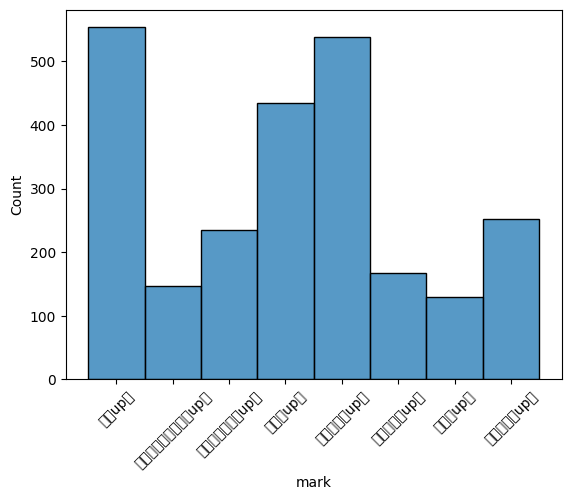

In [32]:
sns.histplot(df['mark'],binwidth=0.1)
plt.xticks(rotation=45)
plt.show()